帰無仮説：5本のエタノールの製造ラインに濃度の差がある

帰無仮説：5本のエタノールの製造ラインに濃度の差はない

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set_theme()

In [58]:
data = pd.read_csv('ethanol_data.csv')

In [59]:
data.head()

,Density,Line
0,71.624345,A
1,69.388244,A
2,69.471828,A
3,68.927031,A
4,70.865408,A


<Axes: xlabel='Line', ylabel='Density'>

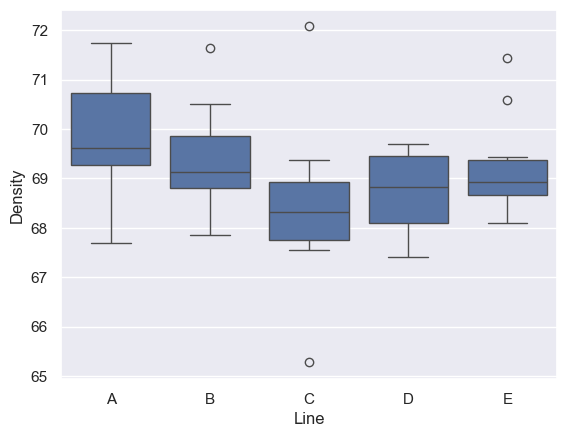

In [60]:
sns.boxplot(x='Line', y='Density', data=data)

In [61]:
mean_Line_A = np.mean(data.query('Line == "A"')['Density'])
mean_Line_B = np.mean(data.query('Line == "B"')['Density'])
mean_Line_C = np.mean(data.query('Line == "C"')['Density']) 
mean_Line_D = np.mean(data.query('Line == "D"')['Density'])
mean_Line_E = np.mean(data.query('Line == "E"')['Density'])

print(f'Line A mean: {mean_Line_A}')
print(f'Line B mean: {mean_Line_B}')
print(f'Line C mean: {mean_Line_C}')
print(f'Line D mean: {mean_Line_D}')
print(f'Line E mean: {mean_Line_E}')

Line A mean: 69.9028591091939
Line B mean: 69.36865005840154
Line C mean: 68.42904350984494
Line D mean: 68.73809656689362
Line E mean: 69.23379915563066


In [62]:
mean_all = np.mean(data['Density'])
print(f'ALL Line mean: {mean_all}')

ALL Line mean: 69.13448967999292


In [63]:
mean_ndarray_list = [mean_Line_A]*data.query('Line == "A"').shape[0] + \
                    [mean_Line_B]*data.query('Line == "B"').shape[0] + \
                    [mean_Line_C]*data.query('Line == "C"').shape[0] + \
                    [mean_Line_D]*data.query('Line == "D"').shape[0] + \
                    [mean_Line_E]*data.query('Line == "E"').shape[0]
mean_ndarray = np.array(mean_ndarray_list)

# 効果
effect = mean_ndarray - mean_all

# 効果の平方和（群間平方和）
squares_Line = np.sum(effect**2)
print(f"効果の平方和：{squares_Line}")

# 誤差
residual = data['Density'] - mean_ndarray

# 誤差の平方和（群内平方和）
squares_residual = np.sum(residual**2)
print(f"誤差の平方和：{squares_residual}")

効果の平方和：13.098668335875512
誤差の平方和：67.4069531127806


In [64]:
# 群間変動（効果）の自由度 = 5(ラインの数) - 1
df_Line = 4

# 群内変動（誤差）の自由度 = ラインAの自由度　+ ラインBの自由度 + ラインCの自由度 + ラインDのライン + ラインEの自由度 
#                        = 5 * (10 - 1)
df_residual = 45

In [65]:
# 効果の分散
variance_Line = squares_Line / df_Line
print(f"効果の分散：{variance_Line}")

# 誤差の分散
variance_residual = squares_residual / df_residual
print(f"誤差の分散：{variance_residual}")

効果の分散：3.274667083968878
誤差の分散：1.4979322913951245


In [66]:
# F比を計算
f_ratio = variance_Line / variance_residual
print(f"F比：{f_ratio}")


F比：2.1861249021602718


In [67]:
#p値を計算
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_Line, dfd=df_residual)

np.float64(0.08574964851206646)

In [68]:
#Statsmodelsの命令を使って、一元分散分析を実行し、結果の表を表示
anova_model_1 = smf.ols('Density ~ Line', data=data).fit()
sm.stats.anova_lm(anova_model_1, typ=2)


,sum_sq,df,F,PR(>F)
Line,13.098668,4.0,2.186125,0.08575
Residual,67.406953,45.0,NaN,NaN


上記のように、P値が有意水準を上回っているため、有意差があるとは言い切れない。

よって、5本のエタノールの製造ラインに濃度の差はないとは言い切れない。